<a href="https://colab.research.google.com/github/nitishxthakur/DataLab/blob/main/MNIST_Digit_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  2

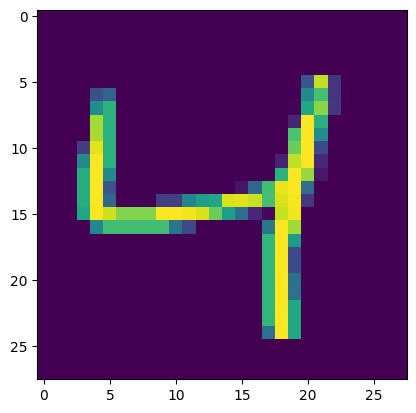

In [3]:
np.set_printoptions(threshold=np.inf,linewidth=420)
print(x_train[2])
plt.imshow(x_train[2])

In [5]:
print(x_train.shape,x_test.shape)
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train/255.0;
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test/255.0;



(60000, 28, 28) (10000, 28, 28)


In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9073 - loss: 0.3113
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - accuracy: 0.9835 - loss: 0.0538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9900 - loss: 0.0322
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9940 - loss: 0.0182
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9959 - loss: 0.0144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9966 - loss: 0.0100
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9981 - loss: 0.0065
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9982 - loss: 0.0062
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9988 - loss: 0.0040
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9989 - loss: 0.0037


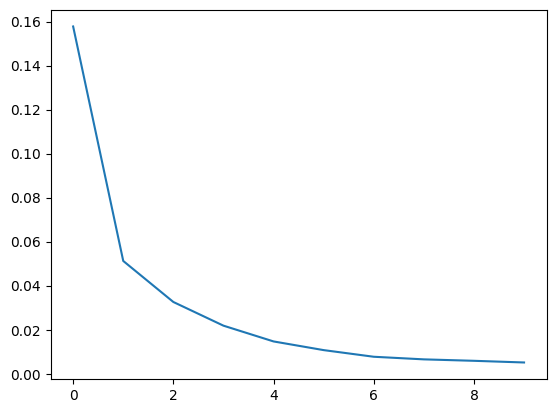

In [12]:
plt.plot(history.history['loss'])

In [13]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9856 - loss: 0.0583


[0.04612768068909645, 0.9883999824523926]